In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

master_file_path = '/content/drive/MyDrive/Data Analysis Projects/Project #1 - Airline Passengers/Data/master.csv'

print(f'Master dataset saved to {master_file_path}')


Master dataset saved to /content/drive/MyDrive/Data Analysis Projects/Project #1 - Airline Passengers/Data/master.csv


In [ ]:
master_df = pd.read_csv(master_file_path)

# Drop the unnecessary 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in master_df.columns:
    master_df = master_df.drop(columns=['Unnamed: 0'])

master_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# prompt: find out how many entries are in the master_df dataframe

print(f'There are {master_df.shape[0]} entries in the master_df dataframe.')


There are 129880 entries in the master_df dataframe.


In [ ]:
# List unique values for specified columns
gender_unique = master_df['Gender'].unique()
customer_type_unique = master_df['Customer Type'].unique()
age_unique = np.sort(master_df['Age'].unique())
type_of_travel_unique = master_df['Type of Travel'].unique()
class_unique = master_df['Class'].unique()
satisfaction_unique = master_df['satisfaction'].unique()

# Display the unique values
print("Unique values in 'Gender':", gender_unique)
print("Unique values in 'Customer Type':", customer_type_unique)
print("Unique values in 'Age':", age_unique)
print("Unique values in 'Type of Travel':", type_of_travel_unique)
print("Unique values in 'Class':", class_unique)
print("Unique values in 'satisfaction':", satisfaction_unique)

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Unique values in 'Age': [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 85]
Unique values in 'Type of Travel': ['Personal Travel' 'Business travel']
Unique values in 'Class': ['Eco Plus' 'Business' 'Eco']
Unique values in 'satisfaction': ['neutral or dissatisfied' 'satisfied']


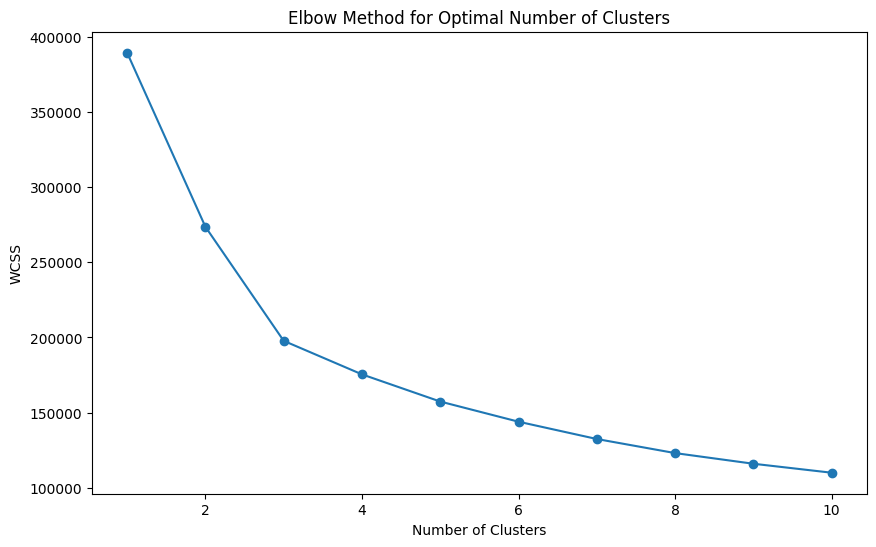

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the path to the master dataset
master_file_path = '/content/drive/MyDrive/Data Analysis Projects/Project #1 - Airline Passengers/Data/master.csv'

# Load the master dataset
master_df = pd.read_csv(master_file_path)

# Select relevant columns for clustering
columns = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance']
data = master_df[columns].copy()

# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
  data[column] = label_encoder.fit_transform(data[column])

# Normalize numerical variables
scaler = StandardScaler()
data[['Age','Flight Distance']] = scaler.fit_transform(data[['Age','Flight Distance']])

# Determine the optimal number of clusters using the elbow method
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

# Plot the elbow graph

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### Encoding Process Documentation

#### Introduction
In data analysis, especially when preparing data for machine learning models, it is crucial to transform the data into a suitable format. This section outlines the process of encoding categorical variables and normalizing numerical variables for cluster analysis using the K-Means algorithm.

#### Data Loading
First, the dataset is loaded from a specified file path. The dataset contains various features relevant to airline passenger satisfaction, such as gender, customer type, age, type of travel, class, and flight distance.

#### Selecting Relevant Columns
To perform clustering, a subset of columns that are most relevant to the analysis is selected. These columns include both categorical and numerical variables:
- **Categorical Variables**: Gender, Customer Type, Type of Travel, Class
- **Numerical Variables**: Age, Flight Distance

#### Encoding Categorical Variables
Categorical variables are non-numeric and need to be converted into a numeric format to be used in clustering algorithms. This is done using **Label Encoding**. Label Encoding transforms each category into a unique integer. For instance:
- **Gender**: Male and Female are encoded as 0 and 1.
- **Customer Type**: Loyal Customer and Disloyal Customer are encoded as 0 and 1.
- **Type of Travel**: Personal Travel and Business Travel are encoded as 0 and 1.
- **Class**: Eco, Eco Plus, and Business are encoded as 0, 1, and 2 respectively.

#### Normalizing Numerical Variables
Numerical variables, such as age and flight distance, are then normalized. Normalization ensures that these variables contribute equally to the distance calculations used in the clustering algorithm. **Standard Scaling** is used for normalization, which transforms the data to have a mean of 0 and a standard deviation of 1. This process adjusts the scale of the numerical features without distorting differences in the ranges of values.

#### Determining the Optimal Number of Clusters
To identify the optimal number of clusters for the K-Means algorithm, the **Elbow Method** is employed. This involves:
1. Running the K-Means algorithm for a range of cluster numbers (e.g., 1 to 10).
2. Calculating the Within-Cluster Sum of Squares (WCSS) for each number of clusters.
3. Plotting the WCSS against the number of clusters to create an elbow graph.

The point where the plot forms an 'elbow' indicates the optimal number of clusters. This point represents a balance between having too many clusters (which overfits the data) and too few clusters (which underfits the data).

#### Conclusion
By encoding categorical variables and normalizing numerical variables, the dataset is transformed into a format suitable for K-Means clustering. The Elbow Method helps determine the optimal number of clusters, enabling effective segmentation of the data. This preprocessing step is crucial for accurate and meaningful cluster analysis.

In [ ]:

# Based on the elbow method, choose an appropriate number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data)

# Analyze clusters
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

# Add cluster information back to the original dataframe
master_df['Cluster'] = data['Cluster']

# Save the updated dataframe with clusters
master_file_path_with_clusters = '/content/drive/MyDrive/Data Analysis Projects/Project #1 - Airline Passengers/Data/master_with_clusters.csv'
master_df.to_csv(master_file_path_with_clusters, index=False)

# Display the first few rows of the dataframe with cluster labels
print(master_df.head())
print(f'Master dataset with clusters saved to {master_file_path_with_clusters}')


           Gender  Customer Type       Age  Type of Travel     Class  \
Cluster                                                                
0        0.498112       0.020085  0.292274        0.040945  0.061742   
1        0.479836       0.591638 -0.635300        0.011152  0.471279   
2        0.497925       0.048181  0.973207        0.466393  0.794698   
3        0.495312       0.021563 -1.072319        0.863590  1.175616   

         Flight Distance  
Cluster                   
0               1.464720  
1              -0.479754  
2              -0.524645  
3              -0.427203  
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     L

### Cluster Summary

The following table summarizes the mean values of each feature for the four clusters:

|            | Gender | Customer Type | Age       | Type of Travel | Class     | Flight Distance |
|------------|--------|---------------|-----------|----------------|-----------|-----------------|
| **Cluster 0** | 0.498  | 0.020         | 0.292     | 0.041          | 0.062     | 1.465           |
| **Cluster 1** | 0.480  | 0.592         | -0.635    | 0.011          | 0.471     | -0.480          |
| **Cluster 2** | 0.498  | 0.048         | 0.973     | 0.466          | 0.795     | -0.525          |
| **Cluster 3** | 0.495  | 0.022         | -1.072    | 0.864          | 1.176     | -0.427          |

#### Interpretation of Clusters

- **Cluster 0**:
  - **Gender**: Balanced (close to 0.5)
  - **Customer Type**: Mostly loyal customers
  - **Age**: Slightly above average
  - **Type of Travel**: Mostly personal travel
  - **Class**: Predominantly economy class
  - **Flight Distance**: High average flight distance
  
  **Interpretation**: This cluster represents a mix of young and middle-aged loyal customers who primarily travel for personal reasons, preferring economy class and taking longer flights.

- **Cluster 1**:
  - **Gender**: Slightly more males
  - **Customer Type**: Predominantly disloyal customers
  - **Age**: Below average
  - **Type of Travel**: Both business and personal travel
  - **Class**: Mix of classes, leaning towards higher classes
  - **Flight Distance**: Below average flight distance
  
  **Interpretation**: This cluster includes younger, disloyal customers who travel for both business and personal reasons. They prefer higher classes but take shorter flights.

- **Cluster 2**:
  - **Gender**: Balanced
  - **Customer Type**: Mostly loyal customers
  - **Age**: Above average
  - **Type of Travel**: Predominantly business travel
  - **Class**: Higher class preference
  - **Flight Distance**: Below average flight distance
  
  **Interpretation**: This cluster represents older, loyal customers who primarily travel for business and prefer higher classes. They typically take shorter flights.

- **Cluster 3**:
  - **Gender**: Balanced
  - **Customer Type**: Mostly loyal customers
  - **Age**: Well below average
  - **Type of Travel**: Mostly business travel
  - **Class**: Highest class preference
  - **Flight Distance**: Slightly below average flight distance
  
  **Interpretation**: This cluster is composed of very young, loyal customers who mainly travel for business and have a strong preference for the highest class. They tend to take shorter flights.

In [ ]:
# Define descriptive names for each cluster based on characteristics
cluster_names = {
    0: "Adventurous Loyalists",
    1: "Young Independent Travelers",
    2: "Executive Veterans",
    3: "Elite Young Professionals"
}

# Calculate the percentage of customers in each cluster
cluster_counts = master_df['Cluster'].value_counts()
total_customers = len(master_df)
cluster_percentages = (cluster_counts / total_customers) * 100

# Measure uniformity of clusters using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, master_df['Cluster'])

# Print cluster information
print("Cluster Names:")
for cluster, name in cluster_names.items():
    print(f"Cluster {cluster}: {name}")

print("\nPercentage of Customers in Each Cluster:")
print(cluster_percentages)

print("\nSilhouette Score:", silhouette_avg)

Cluster Names:
Cluster 0: Adventurous Loyalists
Cluster 1: Young Independent Travelers
Cluster 2: Executive Veterans
Cluster 3: Elite Young Professionals

Percentage of Customers in Each Cluster:
Cluster
2    30.058516
1    26.995688
0    24.878349
3    18.067447
Name: count, dtype: float64

Silhouette Score: 0.39298913023822896


# Customer Cluster Analysis Documentation

## Introduction
This documentation provides an analysis of airline passenger data, segmented into four distinct clusters. Each cluster represents a unique group of passengers with specific characteristics, preferences, and behaviors. The clusters are named based on their attributes, and customer profiles are created to represent typical members of each group.

## Clusters Overview

### Cluster 0: Adventurous Loyalists

**Characteristics:**
- **Gender:** Balanced (close to 0.5)
- **Customer Type:** Mostly loyal customers
- **Age:** Slightly above average
- **Type of Travel:** Mostly personal travel
- **Class:** Predominantly economy class
- **Flight Distance:** High average flight distance

**Representative Name:** Adventurous Loyalists

**Customer Profile:**
- **Name:** Sarah Thompson
- **Age:** 34
- **Gender:** Female
- **Occupation:** Marketing Executive
- **Background:** Sarah is a young professional who enjoys traveling during her vacations. She values loyalty programs and often sticks with the same airline for the benefits. Sarah prefers affordable travel options and typically flies in the economy class, but she doesn't mind spending extra on long-haul flights for better comfort.

**Needs and Wants:**
- Reliable and consistent service
- Attractive loyalty rewards and benefits
- Affordable travel options with occasional upgrades
- Good in-flight entertainment and services for long flights

**Values and Preferences:**
- Cost-effectiveness
- Comfort and convenience
- High-quality customer service
- Flexibility in booking and travel plans

### Cluster 1: Young Independent Travelers

**Characteristics:**
- **Gender:** Slightly more males
- **Customer Type:** Predominantly disloyal customers
- **Age:** Below average
- **Type of Travel:** Both business and personal travel
- **Class:** Mix of classes, leaning towards higher classes
- **Flight Distance:** Below average flight distance

**Representative Name:** Young Independent Travelers

**Customer Profile:**
- **Name:** Michael Johnson
- **Age:** 28
- **Gender:** Male
- **Occupation:** Freelance Graphic Designer
- **Background:** Michael is an independent traveler who often books last-minute trips for both business and pleasure. He is not loyal to any specific airline and chooses based on convenience and price. Michael values comfort and is willing to pay for business class on shorter flights to make the most of his travel time.

**Needs and Wants:**
- Flexibility in booking and rescheduling
- Competitive pricing with occasional premium service
- Quick and efficient service, including check-in and boarding
- Reliable internet connectivity for working on-the-go

**Values and Preferences:**
- Convenience and efficiency
- High level of service for shorter flights
- Flexibility and choice
- Technology and connectivity

### Cluster 2: Executive Veterans

**Characteristics:**
- **Gender:** Balanced
- **Customer Type:** Mostly loyal customers
- **Age:** Above average
- **Type of Travel:** Predominantly business travel
- **Class:** Higher class preference
- **Flight Distance:** Below average flight distance

**Representative Name:** Executive Veterans

**Customer Profile:**
- **Name:** Robert King
- **Age:** 52
- **Gender:** Male
- **Occupation:** Businessman
- **Background:** Robert is a seasoned business traveler who frequently flies for work. He values loyalty programs and prefers flying business class for the comfort and amenities. Robert typically travels on shorter flights but expects a high level of service and efficiency.

**Needs and Wants:**
- Seamless travel experience with minimal disruptions
- High-quality service and comfort
- Priority boarding and check-in
- Access to lounges and other business-related amenities

**Values and Preferences:**
- Efficiency and reliability
- High level of comfort and service
- Business-friendly amenities
- Loyalty rewards and benefits

### Cluster 3: Elite Young Professionals

**Characteristics:**
- **Gender:** Balanced
- **Customer Type:** Mostly loyal customers
- **Age:** Well below average
- **Type of Travel:** Mostly business travel
- **Class:** Highest class preference
- **Flight Distance:** Slightly below average flight distance

**Representative Name:** Elite Young Professionals

**Customer Profile:**
- **Name:** Emily Davis
- **Age:** 24
- **Gender:** Female
- **Occupation:** Financial Analyst
- **Background:** Emily is a young professional who frequently travels for business. Despite her age, she has already established herself as a loyal customer of her preferred airline. Emily enjoys the perks of flying first class and values the high level of service and comfort provided.

**Needs and Wants:**
- Premium services and amenities
- Priority check-in and boarding
- High-quality in-flight service and entertainment
- Business-related amenities and facilities

**Values and Preferences:**
- Premium experience and comfort
- Efficient and high-quality service
- Business-friendly environment
- Loyalty rewards and exclusive benefits

## Conclusion
The clustering analysis has identified four distinct groups of airline passengers, each with unique characteristics and preferences. Understanding these clusters helps tailor marketing strategies, improve customer service, and enhance the overall travel experience for each group. By catering to the specific needs and values of each cluster, airlines can foster customer loyalty and satisfaction.

In [ ]:
# Cluster 0: Adventurous Loyalists
# Cluster 1: Young Independent Travelers
# Cluster 2: Executive Veterans
# Cluster 3: Elite Young Professionals

cluster_names = {
    0: "Adventurous Loyalists",
    1: "Young Independent Travelers",
    2: "Executive Veterans",
    3: "Elite Young Professionals"
}

master_df['Cluster Name'] = master_df['Cluster'].map(cluster_names)

# Display the first few rows of the dataframe with cluster labels and names
print(master_df.head())


   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Leg room service  Baggage handling  \
0                                  4  ...                 3                 4   
1                                  2  ...                 5   

In [ ]:
# Define service areas of interest
service_areas = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Iterate over each named cluster
for cluster in master_df['Cluster'].unique():
    cluster_name = master_df.loc[master_df['Cluster'] == cluster, 'Cluster Name'].iloc[0]  # Get the cluster name

    cluster_data = master_df[master_df['Cluster'] == cluster]

    # Calculate satisfaction levels for each service area within the cluster
    satisfaction_levels = {}
    for area in service_areas:
        satisfaction_counts = cluster_data.groupby(area)['satisfaction'].value_counts(normalize=True).unstack()
        satisfaction_levels[area] = satisfaction_counts

    # Print cluster name and satisfaction levels for each service area
    print(f"\nCluster {cluster}: {cluster_name}")
    for area in service_areas:
        print(f"\nSatisfaction levels for {area}:")
        display(satisfaction_levels[area])


Cluster 3: Elite Young Professionals

Satisfaction levels for Inflight wifi service:


satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,0.014085,0.985915
1,0.999752,0.000248
2,0.998807,0.001193
3,0.991515,0.008485
4,0.672205,0.327795
5,0.015011,0.984989



Satisfaction levels for Departure/Arrival time convenient:


satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,0.768437,0.231563
1,0.827353,0.172647
2,0.846275,0.153725
3,0.849634,0.150366
4,0.868583,0.131417
5,0.866742,0.133258



Satisfaction levels for Ease of Online booking:


satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,0.536140,0.463860
1,0.939455,0.060545
2,0.967527,0.032473
3,0.964702,0.035298
4,0.747520,0.252480
5,0.353258,0.646742



Satisfaction levels for Gate location:


satisfaction,neutral or dissatisfied,satisfied
Gate location,,
1,0.842932,0.157068
2,0.850225,0.149775
3,0.872073,0.127927
4,0.866202,0.133798
5,0.801591,0.198409



Satisfaction levels for Food and drink:


satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.604651,0.395349
1,0.896004,0.103996
2,0.898137,0.101863
3,0.893158,0.106842
4,0.810784,0.189216
5,0.788478,0.211522



Satisfaction levels for Online boarding:


satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,0.546657,0.453343
1,0.987368,0.012632
2,0.992784,0.007216
3,0.985609,0.014391
4,0.689392,0.310608
5,0.250000,0.750000



Satisfaction levels for Seat comfort:


satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
1,0.898985,0.101015
2,0.893196,0.106804
3,0.869676,0.130324
4,0.816302,0.183698
5,0.804038,0.195962



Satisfaction levels for Inflight entertainment:


satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,1.000000,NaN
1,0.892519,0.107481
2,0.893095,0.106905
3,0.889732,0.110268
4,0.816568,0.183432
5,0.794670,0.205330



Satisfaction levels for On-board service:


satisfaction,neutral or dissatisfied,satisfied
On-board service,,
1,0.837610,0.162390
2,0.842596,0.157404
3,0.865947,0.134053
4,0.869633,0.130367
5,0.845077,0.154923



Satisfaction levels for Leg room service:


satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,0.600000,0.400000
1,0.816896,0.183104
2,0.849876,0.150124
3,0.861245,0.138755
4,0.871765,0.128235
5,0.862278,0.137722



Satisfaction levels for Baggage handling:


satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,0.717892,0.282108
2,0.811121,0.188879
3,0.876964,0.123036
4,0.875624,0.124376
5,0.856732,0.143268



Satisfaction levels for Checkin service:


satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
1,0.839522,0.160478
2,0.840768,0.159232
3,0.867201,0.132799
4,0.870556,0.129444
5,0.842140,0.157860



Satisfaction levels for Inflight service:


satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
1,0.746734,0.253266
2,0.797094,0.202906
3,0.870961,0.129039
4,0.872809,0.127191
5,0.863359,0.136641



Satisfaction levels for Cleanliness:


satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,1.000000,NaN
1,0.895611,0.104389
2,0.894922,0.105078
3,0.887945,0.112055
4,0.813953,0.186047
5,0.794747,0.205253



Cluster 1: Young Independent Travelers

Satisfaction levels for Inflight wifi service:


satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,0.000772,0.999228
1,0.758670,0.241330
2,0.807240,0.192760
3,0.793740,0.206260
4,0.386173,0.613827
5,0.009885,0.990115



Satisfaction levels for Departure/Arrival time convenient:


satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,0.501682,0.498318
1,0.660887,0.339113
2,0.703543,0.296457
3,0.683168,0.316832
4,0.513722,0.486278
5,0.356343,0.643657



Satisfaction levels for Ease of Online booking:


satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,0.186842,0.813158
1,0.709828,0.290172
2,0.762678,0.237322
3,0.737376,0.262624
4,0.446439,0.553561
5,0.211034,0.788966



Satisfaction levels for Gate location:


satisfaction,neutral or dissatisfied,satisfied
Gate location,,
1,0.489288,0.510712
2,0.525164,0.474836
3,0.672738,0.327262
4,0.650954,0.349046
5,0.438447,0.561553



Satisfaction levels for Food and drink:


satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.419355,0.580645
1,0.774576,0.225424
2,0.666234,0.333766
3,0.650745,0.349255
4,0.475132,0.524868
5,0.443498,0.556502



Satisfaction levels for Online boarding:


satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,0.199825,0.800175
1,0.919163,0.080837
2,0.913499,0.086501
3,0.887275,0.112725
4,0.337713,0.662287
5,0.046149,0.953851



Satisfaction levels for Seat comfort:


satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
1,0.759459,0.240541
2,0.734060,0.265940
3,0.723497,0.276503
4,0.451330,0.548670
5,0.395682,0.604318



Satisfaction levels for Inflight entertainment:


satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,1.000000,NaN
1,0.803113,0.196887
2,0.739997,0.260003
3,0.702774,0.297226
4,0.438808,0.561192
5,0.398406,0.601594



Satisfaction levels for On-board service:


satisfaction,neutral or dissatisfied,satisfied
On-board service,,
1,0.792511,0.207489
2,0.758094,0.241906
3,0.618840,0.381160
4,0.534132,0.465868
5,0.350480,0.649520



Satisfaction levels for Leg room service:


satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,0.866667,0.133333
1,0.759888,0.240112
2,0.623961,0.376039
3,0.630242,0.369758
4,0.505427,0.494573
5,0.503147,0.496853



Satisfaction levels for Baggage handling:


satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,0.578469,0.421531
2,0.659371,0.340629
3,0.809053,0.190947
4,0.574321,0.425679
5,0.366262,0.633738



Satisfaction levels for Checkin service:


satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
1,0.777755,0.222245
2,0.764059,0.235941
3,0.566851,0.433149
4,0.554993,0.445007
5,0.372265,0.627735



Satisfaction levels for Inflight service:


satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
1,0.576287,0.423713
2,0.652753,0.347247
3,0.821962,0.178038
4,0.576730,0.423270
5,0.367553,0.632447



Satisfaction levels for Cleanliness:


satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,1.000000,NaN
1,0.769526,0.230474
2,0.737999,0.262001
3,0.627997,0.372003
4,0.473257,0.526743
5,0.423471,0.576529



Cluster 2: Executive Veterans

Satisfaction levels for Inflight wifi service:


satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,NaN,1.000000
1,0.765483,0.234517
2,0.817177,0.182823
3,0.820757,0.179243
4,0.429257,0.570743
5,0.005198,0.994802



Satisfaction levels for Departure/Arrival time convenient:


satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,0.670599,0.329401
1,0.526335,0.473665
2,0.567151,0.432849
3,0.585504,0.414496
4,0.698075,0.301925
5,0.680684,0.319316



Satisfaction levels for Ease of Online booking:


satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,0.477058,0.522942
1,0.665081,0.334919
2,0.741383,0.258617
3,0.743370,0.256630
4,0.540443,0.459557
5,0.336952,0.663048



Satisfaction levels for Gate location:


satisfaction,neutral or dissatisfied,satisfied
Gate location,,
1,0.574876,0.425124
2,0.618576,0.381424
3,0.712461,0.287539
4,0.656434,0.343566
5,0.506531,0.493469



Satisfaction levels for Food and drink:


satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.892857,0.107143
1,0.805601,0.194399
2,0.658591,0.341409
3,0.655580,0.344420
4,0.565035,0.434965
5,0.545455,0.454545



Satisfaction levels for Online boarding:


satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,0.641762,0.358238
1,0.804503,0.195497
2,0.850945,0.149055
3,0.881059,0.118941
4,0.514835,0.485165
5,0.307435,0.692565



Satisfaction levels for Seat comfort:


satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
0,1.000000,NaN
1,0.763056,0.236944
2,0.791526,0.208474
3,0.831409,0.168591
4,0.553981,0.446019
5,0.440798,0.559202



Satisfaction levels for Inflight entertainment:


satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,1.000000,NaN
1,0.897627,0.102373
2,0.839250,0.160750
3,0.790951,0.209049
4,0.446190,0.553810
5,0.409530,0.590470



Satisfaction levels for On-board service:


satisfaction,neutral or dissatisfied,satisfied
On-board service,,
0,1.000000,NaN
1,0.823647,0.176353
2,0.789941,0.210059
3,0.766478,0.233522
4,0.508941,0.491059
5,0.431983,0.568017



Satisfaction levels for Leg room service:


satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,0.628684,0.371316
1,0.841115,0.158885
2,0.833564,0.166436
3,0.836952,0.163048
4,0.439516,0.560484
5,0.354246,0.645754



Satisfaction levels for Baggage handling:


satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,0.780801,0.219199
2,0.768815,0.231185
3,0.779103,0.220897
4,0.555895,0.444105
5,0.464446,0.535554



Satisfaction levels for Checkin service:


satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
0,1.000000,NaN
1,0.759808,0.240192
2,0.749140,0.250860
3,0.621732,0.378268
4,0.622957,0.377043
5,0.482576,0.517424



Satisfaction levels for Inflight service:


satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
0,1.000000,NaN
1,0.788239,0.211761
2,0.767726,0.232274
3,0.779196,0.220804
4,0.559170,0.440830
5,0.462466,0.537534



Satisfaction levels for Cleanliness:


satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,1.000000,NaN
1,0.812354,0.187646
2,0.807421,0.192579
3,0.637986,0.362014
4,0.560947,0.439053
5,0.463055,0.536945



Cluster 0: Adventurous Loyalists

Satisfaction levels for Inflight wifi service:


satisfaction,neutral or dissatisfied,satisfied
Inflight wifi service,,
0,NaN,1.000000
1,0.281401,0.718599
2,0.372771,0.627229
3,0.364210,0.635790
4,0.193189,0.806811
5,0.012211,0.987789



Satisfaction levels for Departure/Arrival time convenient:


satisfaction,neutral or dissatisfied,satisfied
Departure/Arrival time convenient,,
0,0.161028,0.838972
1,0.241167,0.758833
2,0.261344,0.738656
3,0.257956,0.742044
4,0.266070,0.733930
5,0.259137,0.740863



Satisfaction levels for Ease of Online booking:


satisfaction,neutral or dissatisfied,satisfied
Ease of Online booking,,
0,0.081152,0.918848
1,0.253604,0.746396
2,0.288766,0.711234
3,0.286837,0.713163
4,0.246637,0.753363
5,0.228266,0.771734



Satisfaction levels for Gate location:


satisfaction,neutral or dissatisfied,satisfied
Gate location,,
0,NaN,1.000000
1,0.233649,0.766351
2,0.247635,0.752365
3,0.280679,0.719321
4,0.268462,0.731538
5,0.241191,0.758809



Satisfaction levels for Food and drink:


satisfaction,neutral or dissatisfied,satisfied
Food and drink,,
0,0.433333,0.566667
1,0.675759,0.324241
2,0.298126,0.701874
3,0.290993,0.709007
4,0.172146,0.827854
5,0.145036,0.854964



Satisfaction levels for Online boarding:


satisfaction,neutral or dissatisfied,satisfied
Online boarding,,
0,0.607143,0.392857
1,0.549287,0.450713
2,0.650018,0.349982
3,0.636235,0.363765
4,0.172314,0.827686
5,0.016435,0.983565



Satisfaction levels for Seat comfort:


satisfaction,neutral or dissatisfied,satisfied
Seat comfort,,
1,0.515763,0.484237
2,0.619724,0.380276
3,0.711357,0.288643
4,0.176878,0.823122
5,0.035368,0.964632



Satisfaction levels for Inflight entertainment:


satisfaction,neutral or dissatisfied,satisfied
Inflight entertainment,,
0,1.000000,NaN
1,0.820010,0.179990
2,0.640092,0.359908
3,0.494876,0.505124
4,0.115962,0.884038
5,0.041450,0.958550



Satisfaction levels for On-board service:


satisfaction,neutral or dissatisfied,satisfied
On-board service,,
0,1.000000,NaN
1,0.730946,0.269054
2,0.578243,0.421757
3,0.433566,0.566434
4,0.137659,0.862341
5,0.051837,0.948163



Satisfaction levels for Leg room service:


satisfaction,neutral or dissatisfied,satisfied
Leg room service,,
0,0.796296,0.203704
1,0.734341,0.265659
2,0.535572,0.464428
3,0.521511,0.478489
4,0.131125,0.868875
5,0.063923,0.936077



Satisfaction levels for Baggage handling:


satisfaction,neutral or dissatisfied,satisfied
Baggage handling,,
1,0.648378,0.351622
2,0.579693,0.420307
3,0.538819,0.461181
4,0.168089,0.831911
5,0.044689,0.955311



Satisfaction levels for Checkin service:


satisfaction,neutral or dissatisfied,satisfied
Checkin service,,
1,0.645284,0.354716
2,0.630449,0.369551
3,0.233709,0.766291
4,0.210450,0.789550
5,0.041259,0.958741



Satisfaction levels for Inflight service:


satisfaction,neutral or dissatisfied,satisfied
Inflight service,,
0,1.000000,NaN
1,0.670487,0.329513
2,0.575546,0.424454
3,0.526766,0.473234
4,0.161100,0.838900
5,0.048498,0.951502



Satisfaction levels for Cleanliness:


satisfaction,neutral or dissatisfied,satisfied
Cleanliness,,
0,1.000000,NaN
1,0.704589,0.295411
2,0.680102,0.319898
3,0.250322,0.749678
4,0.180655,0.819345
5,0.043917,0.956083


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Inflight wifi service', 'Departure/Arrival time convenient',
            'Ease of Online booking', 'Gate location', 'Food and drink',
            'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Inflight service', 'Cleanliness']
target = 'satisfaction'

# Sort unique cluster labels
unique_clusters = sorted(master_df['Cluster'].unique())

# Iterate over each cluster
for cluster in unique_clusters:
    cluster_name = master_df.loc[master_df['Cluster'] == cluster, 'Cluster Name'].iloc[0]

    # Filter data for the current cluster
    cluster_data = master_df[master_df['Cluster'] == cluster]

    # Split data into train and test sets
    X = cluster_data[features]
    y = cluster_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Random Forest Classifier (or Gradient Boosting Classifier)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    # clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Evaluate model performance
    print(f"\nCluster {cluster}: {cluster_name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({'Feature': features, 'Importance': clf.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    print(feature_importance)


Cluster 0: Adventurous Loyalists
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.95      0.95      1673
              satisfied       0.98      0.99      0.98      4790

               accuracy                           0.98      6463
              macro avg       0.97      0.97      0.97      6463
           weighted avg       0.98      0.98      0.98      6463

Accuracy: 0.9758626025065759

Feature Importance:
                              Feature  Importance
5                     Online boarding    0.147013
7              Inflight entertainment    0.130823
6                        Seat comfort    0.125543
0               Inflight wifi service    0.094313
9                    Leg room service    0.091501
13                        Cleanliness    0.063697
8                    On-board service    0.057017
12                   Inflight service    0.054907
10                   Baggage handling    0.054487
11                    C

### Interpretation of Findings

#### Cluster 0: Adventurous Loyalists
**Feature Importance and Key Drivers of Satisfaction:**
- Online boarding (0.147013)
- Inflight entertainment (0.130823)
- Seat comfort (0.125543)
- Inflight wifi service (0.094313)
- Leg room service (0.091501)

**Interpretation:**
The Adventurous Loyalists are highly influenced by factors that enhance their travel experience through convenience and comfort. The high importance of online boarding indicates that they value a streamlined boarding process, likely due to their frequent travels. Inflight entertainment and seat comfort are critical for maintaining satisfaction, suggesting that they appreciate engaging and comfortable journeys, particularly during long flights. The significance of inflight wifi and leg room services further highlights their preference for connectivity and physical comfort.

#### Cluster 1: Young Independent Travelers
**Feature Importance and Key Drivers of Satisfaction:**
- Online boarding (0.292172)
- Inflight wifi service (0.203540)
- Ease of Online booking (0.071565)
- Inflight entertainment (0.050197)
- On-board service (0.046620)

**Interpretation:**
Young Independent Travelers prioritize features that facilitate a smooth and connected travel experience. The dominant importance of online boarding and inflight wifi service indicates that they value efficiency and staying connected during their travels. Ease of online booking also ranks highly, highlighting their preference for a hassle-free booking process. Inflight entertainment and on-board service, although slightly less critical, are still significant in ensuring their satisfaction, reflecting their desire for a pleasant and engaging travel experience.

#### Cluster 2: Executive Veterans
**Feature Importance and Key Drivers of Satisfaction:**
- Inflight wifi service (0.223073)
- Leg room service (0.151725)
- Online boarding (0.127179)
- Inflight entertainment (0.071291)
- Departure/Arrival time convenient (0.067907)

**Interpretation:**
Executive Veterans are driven by the need for productivity and comfort during their travels. The high importance of inflight wifi service suggests that they need to stay connected and productive while in the air. Leg room service is also crucial, indicating a preference for physical comfort, particularly on long flights. Online boarding ranks highly, showing their need for efficient processes. Inflight entertainment and convenient departure/arrival times are also important, indicating that while they focus on work, they also value punctuality and having options for relaxation.

#### Cluster 3: Elite Young Professionals
**Feature Importance and Key Drivers of Satisfaction:**
- Inflight wifi service (0.406174)
- Online boarding (0.163386)
- Ease of Online booking (0.093316)
- Leg room service (0.039992)
- Gate location (0.039367)

**Interpretation:**
Elite Young Professionals place a very high emphasis on staying connected, as reflected by the substantial importance of inflight wifi service. Online boarding and ease of online booking are also critical, showing their need for efficient and straightforward travel processes. Leg room service and gate location, while less important, still play a role in their satisfaction, indicating a balanced need for comfort and convenience. This cluster's focus on technology and efficiency suggests that they value innovative and streamlined travel solutions.

### Conclusion
The analysis reveals that different customer clusters have distinct priorities when it comes to airline services:

- **Adventurous Loyalists** value convenience and comfort, emphasizing the importance of online boarding, inflight entertainment, and seat comfort.
- **Young Independent Travelers** prioritize efficiency and connectivity, with a strong focus on online boarding, inflight wifi, and ease of online booking.
- **Executive Veterans** need productivity and comfort, highlighted by the importance of inflight wifi, leg room service, and online boarding.
- **Elite Young Professionals** are driven by a high need for connectivity and efficient processes, with inflight wifi being the most critical factor.

By understanding these key drivers of satisfaction, airlines can tailor their services to better meet the expectations of each customer segment, ultimately enhancing overall satisfaction and loyalty.

# Insights from Analysis of Key Drivers of Satisfaction

**Report Overview:**
This report analyzes customer satisfaction drivers identified through random forest classification across four distinct customer segments. Key drivers are assessed based on Gini Importance scores, which measure the relative importance of each feature in predicting overall customer satisfaction within each cluster.

## Cluster 0: Adventurous Loyalists

### Drivers of Satisfaction and Influence:
- **Online boarding (0.147013):** Efficient and streamlined boarding processes. (High Influence)
- **Inflight entertainment (0.130823):** Variety and quality of onboard entertainment. (High Influence)
- **Seat comfort (0.125543):** Comfort and ergonomic quality of seating. (High Influence)
- **Inflight wifi service (0.094313):** Availability and reliability of onboard wifi. (Moderate Influence)
- **Leg room service (0.091501):** Adequate leg room space. (Moderate Influence)

### Driver Interactions:
- **Online boarding and seat comfort:** Efficient boarding processes combined with comfortable seating enhance overall travel experience.
- **Inflight entertainment and wifi service:** Both are critical for keeping passengers engaged and connected, suggesting that entertainment options and connectivity work synergistically to boost satisfaction.

### Cross-Cluster Patterns:
- Online boarding: Important in both Cluster 0 and Cluster 1, indicating a broad preference for streamlined boarding processes.
- Inflight wifi service: Significant across all clusters, showing a universal need for connectivity during flights.

## Cluster 1: Young Independent Travelers

### Drivers of Satisfaction and Influence:
- **Online boarding (0.292172):** Smooth and efficient boarding procedures. (High Influence)
- **Inflight wifi service (0.203540):** Reliable and fast onboard wifi. (High Influence)
- **Ease of Online booking (0.071565):** User-friendly online booking platforms. (Moderate Influence)
- **Inflight entertainment (0.050197):** Variety and quality of onboard entertainment. (Low Influence)
- **On-board service (0.046620):** Quality of service during the flight. (Low Influence)

### Driver Interactions:
- **Online boarding and ease of online booking:** A smooth booking and boarding process enhances the overall travel experience.
- **Inflight wifi service and entertainment:** While wifi is more critical, both contribute to a connected and engaging journey.

### Cross-Cluster Patterns:
- Ease of online booking: Also significant in Cluster 3, reflecting a broad desire for a hassle-free booking experience.
- Inflight wifi service: Essential across all clusters, reinforcing its importance for a connected travel experience.

## Cluster 2: Executive Veterans

### Drivers of Satisfaction and Influence:
- **Inflight wifi service (0.223073):** Reliable and fast onboard wifi. (High Influence)
- **Leg room service (0.151725):** Adequate leg room space. (High Influence)
- **Online boarding (0.127179):** Efficient and streamlined boarding processes. (Moderate Influence)
- **Inflight entertainment (0.071291):** Variety and quality of onboard entertainment. (Low Influence)
- **Departure/Arrival time convenient (0.067907):** Convenience of flight timings. (Low Influence)

### Driver Interactions:
- **Inflight wifi service and leg room service:** Providing both connectivity and physical comfort is crucial for satisfaction.
- **Online boarding and convenient departure/arrival times:** Streamlining the entire travel process from boarding to arrival increases overall satisfaction.

### Cross-Cluster Patterns:
- Leg room service: Significant in Cluster 0 and Cluster 2, indicating a general preference for physical comfort across different traveler types.
- Departure/Arrival time convenient: Highlighted in Cluster 2, but also relevant in other clusters as a factor influencing travel convenience.

## Cluster 3: Elite Young Professionals

### Drivers of Satisfaction and Influence:
- **Inflight wifi service (0.406174):** Reliable and fast onboard wifi. (High Influence)
- **Online boarding (0.163386):** Efficient and streamlined boarding processes. (Moderate Influence)
- **Ease of Online booking (0.093316):** User-friendly online booking platforms. (Moderate Influence)
- **Leg room service (0.039992):** Adequate leg room space. (Low Influence)
- **Gate location (0.039367):** Convenient gate locations. (Low Influence)

### Driver Interactions:
- **Inflight wifi service and ease of online booking:** High-tech solutions for connectivity and booking efficiency are paramount.
- **Online boarding and gate location:** Ensuring easy boarding and convenient gate locations streamline the travel experience.

### Cross-Cluster Patterns:
- **Inflight wifi service:** Universally critical across all clusters, indicating a widespread need for connectivity.
- **Online boarding:** Consistently important across clusters, reflecting a common desire for efficient boarding processes.
- **Ease of online booking:** Significant in Cluster 1 and Cluster 3, highlighting a general preference for a seamless booking experience.

## Observations and Additional Considerations

### Common Drivers of Satisfaction:
- Inflight wifi service is universally important, emphasizing the growing reliance on connectivity during flights.
- Online boarding is another common driver, highlighting the need for efficiency in the boarding process across different traveler types.

### Diverse Priorities:
- While connectivity and efficient processes are crucial across the board, the importance of physical comfort (e.g., leg room service) varies, being more significant for Adventurous Loyalists and Executive Veterans.

### Segment-Specific Needs:
- Adventurous Loyalists and Executive Veterans prioritize comfort features like seat comfort and leg room, while Young Independent Travelers and Elite Young Professionals focus more on technological and process efficiencies.

## Strategic Implications for Airlines

- **Enhance Inflight Connectivity:** Investing in reliable and fast inflight wifi services can significantly boost satisfaction across all clusters.
- **Streamline Boarding and Booking Processes:** Simplifying online booking and boarding procedures will meet the needs of multiple segments.
- **Customize Inflight Entertainment and Comfort:** Tailoring entertainment options and ensuring comfortable seating arrangements can cater to the specific preferences of Adventurous Loyalists and Executive Veterans.

By understanding these insights, the airline can strategically enhance their services to cater to the distinct needs of each customer cluster, ultimately improving overall satisfaction and loyalty.